# Pima-Indian-Diabetes-Prediction

# Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic 
measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger 
database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# Content

The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
'''Importing basic useful libraries for feature engineering'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_df = pd.read_csv(filepath_or_buffer="E:\\DataScience\\My Practice Datasets\\diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("No of records and features in Dataset:", diabetes_df.shape, "\n")
print("Checking the presence of null datapoints :\n\n", diabetes_df.isnull().sum(), "\n")
diabetes_df.info()

No of records and features in Dataset: (768, 9) 

Checking the presence of null datapoints :

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
'''From above info we see null rows are not present but we also see some key features are having 0 value, 
   so we will impute them with their respective mean or median values'''

In [4]:
'''Checking count of 0s in each feature'''

for i in diabetes_df.columns:
    print(i, ":\t", len(diabetes_df[diabetes_df[i]==0].index))

Pregnancies :	 111
Glucose :	 5
BloodPressure :	 35
SkinThickness :	 227
Insulin :	 374
BMI :	 11
DiabetesPedigreeFunction :	 0
Age :	 0
Outcome :	 500


In [5]:
'''First, We will impute some key features 0 values with NaN'''

diabetes_df['Glucose'].replace(0, np.nan, inplace=True)
diabetes_df['BloodPressure'].replace(0, np.nan, inplace=True)
diabetes_df['SkinThickness'].replace(0, np.nan, inplace=True)
diabetes_df['Insulin'].replace(0, np.nan, inplace=True)
diabetes_df['BMI'].replace(0, np.nan, inplace=True)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
'''Now, we will impute NaN valued features with their respective mean'''

diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean(), inplace=True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace=True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].mean(), inplace=True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].mean(), inplace=True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].mean(), inplace=True)
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
'''Describing Dataset to understand the the presence of outliers'''
diabetes_df.describe(percentiles=[0.25,0.50,0.75,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
'''From the above description of the dataset, we see that there are some outliers present as there is a huge difference between 
the 75% and 99%, so we will remove some outliers'''

In [8]:
'''Removing outliers from all features'''

Q1 = diabetes_df.quantile(0.10)
Q3 = diabetes_df.quantile(0.90)
IQR = Q3 - Q1

diabetes_df = diabetes_df[~((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).any(axis=1)] 
print(diabetes_df.shape)

(747, 9)


In [9]:
'''Describing dataset again to check if outliers removed successfully or not'''
diabetes_df.describe(percentiles=[0.25,0.50,0.75,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.875502,120.423606,72.419252,28.849834,146.244294,32.295625,0.462150,33.182062,0.338688
std,3.380162,29.701152,12.077689,8.275379,57.631471,6.792201,0.305768,11.689300,0.473581
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.400000,0.243500,24.000000,0.000000
50%,3.000000,116.000000,72.405184,29.153420,155.548223,32.300000,0.368000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,155.548223,36.350000,0.613500,40.500000,1.000000
99%,13.000000,194.540000,106.000000,50.000000,338.780000,49.654000,1.451800,67.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,415.000000,67.100000,1.893000,81.000000,1.000000


In [10]:
'''Now, Separating features(X) and target(y)'''

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values
print(X.shape)
print(y.shape)

(747, 8)
(747,)


In [11]:
'''Printing 1st 5 values of all features(X)'''

print(X[:5,:])

[[6.00000000e+00 1.48000000e+02 7.20000000e+01 3.50000000e+01
  1.55548223e+02 3.36000000e+01 6.27000000e-01 5.00000000e+01]
 [1.00000000e+00 8.50000000e+01 6.60000000e+01 2.90000000e+01
  1.55548223e+02 2.66000000e+01 3.51000000e-01 3.10000000e+01]
 [8.00000000e+00 1.83000000e+02 6.40000000e+01 2.91534196e+01
  1.55548223e+02 2.33000000e+01 6.72000000e-01 3.20000000e+01]
 [1.00000000e+00 8.90000000e+01 6.60000000e+01 2.30000000e+01
  9.40000000e+01 2.81000000e+01 1.67000000e-01 2.10000000e+01]
 [5.00000000e+00 1.16000000e+02 7.40000000e+01 2.91534196e+01
  1.55548223e+02 2.56000000e+01 2.01000000e-01 3.00000000e+01]]


In [12]:
'''Performing Standardisation on the cleaned feature data(X) so that we can bring them on the same scale from -2 to +2'''

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)
print(X[:5,:])

[[ 0.62894061  0.92908419 -0.03473621  0.74368633  0.16154652  0.19216874
   0.53949574  1.43971041]
 [-0.85126933 -1.19346686 -0.53185285  0.01815823  0.16154652 -0.83911557
  -0.36375426 -0.18679678]
 [ 1.22102459  2.10827921 -0.6975584   0.03670994  0.16154652 -1.32529245
   0.68676476 -0.10119114]
 [-0.85126933 -1.05870172 -0.53185285 -0.70736986 -0.90713107 -0.61812607
  -0.96592093 -1.0428532 ]
 [ 0.33289862 -0.14903698  0.13096933  0.03670994  0.16154652 -0.98644189
  -0.854651   -0.27240242]]


In [13]:
'''Spliting features(X) and target(y) data into 70% training to train our model and 30% testing to test our model'''

from sklearn.model_selection import train_test_split, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("70% Features Training Data : ", X_train.shape)
print("30% Features Testing Data : ", X_test.shape)
print("70% Target Training Data : ", y_train.shape)
print("30% Target Testing Data : ", y_test.shape)

70% Features Training Data :  (522, 8)
30% Features Testing Data :  (225, 8)
70% Target Training Data :  (522,)
30% Target Testing Data :  (225,)


# Using Logistic Regression Model

In [14]:
'''Imporing and Creating object of Logistic Regression model'''

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

'''Fitting model object with training data to train our model'''

log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
'''Making class predictions on testing data'''

y_pred = log_model.predict(X_test)

In [16]:
'''Checking predicted data shape'''

y_pred.shape

(225,)

In [17]:
'''Checking Cross validation Score'''

folds = KFold(n_splits=10, shuffle=False, random_state=10)
CrossValScore = cross_val_score(estimator=log_model, X=X_train, y=y_train, cv=folds)
print("Cross Validation Score of 10 folds :\n", CrossValScore, "\n")
print("Average Cross Val Score : ", CrossValScore.mean())

Cross Validation Score of 10 folds :
 [0.79245283 0.81132075 0.80769231 0.82692308 0.65384615 0.71153846
 0.82692308 0.71153846 0.69230769 0.73076923] 

Average Cross Val Score :  0.7565312046444121


In [18]:
'''Checking model Accuracy Score, Classification Report and Confusion Matrix to understand the accuracy'''

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score : ", accuracy_score(y_test, y_pred), "\n")
print("Classification Report :\n", classification_report(y_test, y_pred), "\n")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy Score :  0.8044444444444444 

Classification Report :
              precision    recall  f1-score   support

          0       0.82      0.91      0.86       151
          1       0.77      0.58      0.66        74

avg / total       0.80      0.80      0.80       225
 

Confusion Matrix :
 [[138  13]
 [ 31  43]]


In [19]:
'''Finding class predictions probabilities of testing data and printing first 5 records'''

y_pred_prob = log_model.predict_proba(X_test)
print(y_pred_prob[:5,:])

[[0.89935037 0.10064963]
 [0.27367474 0.72632526]
 [0.29186974 0.70813026]
 [0.90368202 0.09631798]
 [0.67297165 0.32702835]]


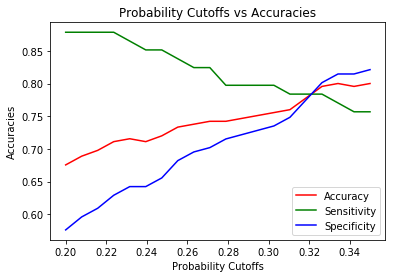

In [20]:
'''Defining random probability cutoff to understand Accuracy, Sensitivity, Specificity of Class 1(diabetic) values by unpacking 
   confusion matix data'''

p_cutoff = np.linspace(0.20,0.35,20)
acc = []
sen = []
spe = []

for pc in p_cutoff:
    y_test_pred = [1 if y>pc else 0 for y in y_pred_prob[:,1]]
    tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
    acc.append(accuracy_score(y_test,y_test_pred))
    sen.append(tp/(tp+fn))
    spe.append(tn/(tn+fp))

plt.plot(p_cutoff, acc, color='red', label="Accuracy")
plt.plot(p_cutoff, sen, color='green', label="Sensitivity")
plt.plot(p_cutoff, spe, color='blue', label="Specificity")
plt.xlabel("Probability Cutoffs")
plt.ylabel("Accuracies")
plt.title("Probability Cutoffs vs Accuracies")
plt.legend(loc=4)
plt.show()

In [21]:
'''Calculating FPR, TPR and Thresholds values'''

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
print("False Positive Rate (FPR) :\n", fpr.shape, "\n")
print("True Positive Rate (TPR) :\n", tpr.shape, "\n")
print("Threshold Values :\n\n", thresholds)

False Positive Rate (FPR) :
 (70,) 

True Positive Rate (TPR) :
 (70,) 

Threshold Values :

 [1.96398527 0.96398527 0.8289923  0.82696869 0.76149443 0.74941653
 0.74838183 0.73893429 0.69647084 0.69395803 0.6834287  0.67532179
 0.6255296  0.62411133 0.62332166 0.59806856 0.57740863 0.56475974
 0.52669834 0.52193169 0.51865013 0.51603319 0.50817913 0.4995695
 0.47546217 0.45319389 0.45250477 0.43656215 0.42286526 0.4152622
 0.3957464  0.38667077 0.3792457  0.37869743 0.37648309 0.36847467
 0.35146847 0.34242751 0.33924598 0.32702835 0.32659106 0.30522534
 0.30480786 0.28294039 0.27768738 0.27552098 0.27393256 0.26786468
 0.25725363 0.25412778 0.25345332 0.2422741  0.22938842 0.19841081
 0.1952045  0.18808264 0.18110491 0.16035347 0.15485612 0.15413338
 0.15031909 0.1434997  0.14311254 0.14232915 0.14032816 0.11261469
 0.11244682 0.09976033 0.09773757 0.01262221]


Text(0.5,1,'ROC-AUC Curve')

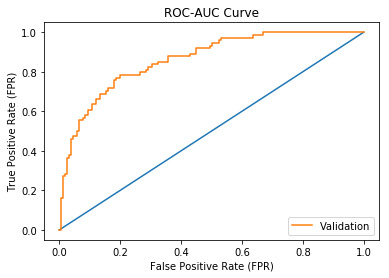

In [22]:
'''Visualising FPR vs TPR on plot'''

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label="Validation")
plt.legend(loc=4)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (FPR)")
plt.title("ROC-AUC Curve")

In [23]:
'''Calculating Area Under the Curve of ROC (Reciever Operating Characteristic)'''

AUC_Score = roc_auc_score(y_test, y_pred_prob[:,1])
print("AUC Score : ", AUC_Score)

AUC Score :  0.861643100053696


# Using KNN (K-Nearest Neighbors) Model

In [24]:
'''Imporing and Creating object of Logistic Regression model'''

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

'''Fitting model object with training data to train our model'''

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
'''Making class predictions on training and testing data and checking their shapes'''

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)
print(y_train_pred_knn.shape)
print(y_test_pred_knn.shape)

(522,)
(225,)


In [26]:
'''Calculating knn model accuracy by defining 5 folds'''

folds = KFold(n_splits=5, shuffle=False, random_state=10)
CrossValScoreKnn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validation Score of 5 folds : ", CrossValScoreKnn, "\n")
print("Average Cross Validation Score 5 folds : ", np.mean(CrossValScoreKnn))

Cross Validation Score of 5 folds :  [0.6952381  0.67619048 0.63461538 0.67307692 0.625     ] 

Average Cross Validation Score 5 folds :  0.6608241758241759


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [27]:
'''Calculating KNN Score, Accuracy Score and Classification Report of Training and Testing data'''

print("Training KNN Score for K=1 : ", knn.score(X_train, y_train), "\n")
print("Training Accuracy Score for K=1 : ", accuracy_score(y_train, y_train_pred_knn), "\n")
print("Training Classification Report for K=1 :\n", classification_report(y_train, y_train_pred_knn), "\n")
print("_"*100)
print("Training KNN Score for K=1 : ", knn.score(X_test, y_test), "\n")
print("Testing Accuracy Score for K=1 : ", accuracy_score(y_test, y_test_pred_knn), "\n")
print("Testing Classification Report K=1 :\n", classification_report(y_test, y_test_pred_knn), "\n")

Training KNN Score for K=1 :  1.0 

Training Accuracy Score for K=1 :  1.0 

Training Classification Report for K=1 :
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       343
          1       1.00      1.00      1.00       179

avg / total       1.00      1.00      1.00       522
 

____________________________________________________________________________________________________
Training KNN Score for K=1 :  0.72 

Testing Accuracy Score for K=1 :  0.72 

Testing Classification Report K=1 :
              precision    recall  f1-score   support

          0       0.78      0.81      0.79       151
          1       0.58      0.54      0.56        74

avg / total       0.72      0.72      0.72       225
 



In [28]:
'''Tuning KNN Model with K from 1 to 15 to get the best value of K'''

neighbors = np.arange(1,15)
training_accuracy = np.empty(len(neighbors))
testing_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracy[i] = knn.score(X_train, y_train)
    testing_accuracy[i] = knn.score(X_test, y_test)

In [29]:
'''Checking Training and Testing data shape after tuning them'''

print("Training KNN for K=1 to 15 :", training_accuracy.shape, "\n")
print("Testing KNN for K=1 to 15 : ", testing_accuracy.shape, "\n")

Training KNN for K=1 to 15 : (14,) 

Testing KNN for K=1 to 15 :  (14,) 



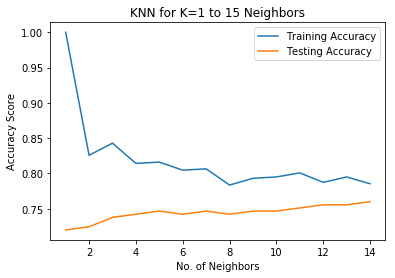

In [30]:
'''Graphical representation of K=1 to 15 Neighbors w.r.t. their Accuracy Score'''

plt.plot(neighbors, training_accuracy, label="Training Accuracy")
plt.plot(neighbors, testing_accuracy, label="Testing Accuracy")
plt.legend(loc=0)
plt.xlabel("No. of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("KNN for K=1 to 15 Neighbors")
plt.show()

In [31]:
'''Best value of K appears to be 11 because the difference between training and testing accuracy scores is less 
   and the accuracies appear to be less varying further, hence fitting our model with neighbores K=11'''

tuned_knn = KNeighborsClassifier(n_neighbors=11)
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [32]:
'''Calculating Cross Validarion Score, Training and Testing Score for K=11'''

folds = KFold(n_splits=5, shuffle=False, random_state=10)
CrossValScore_knn = cross_val_score(estimator=tuned_knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validarion Score of 5 folds for K=11 : ", CrossValScore_knn, "\n")

print("Average Cross Validarion Score for K=11 : ", np.mean(CrossValScore_knn), "\n")

print("Training KNN Score for K=11 : ", tuned_knn.score(X_train, y_train), "\n")

print("Testing KNN Score for K=11 : ", tuned_knn.score(X_test, y_test), "\n")

Cross Validarion Score of 5 folds for K=11 :  [0.74285714 0.75238095 0.71153846 0.77884615 0.70192308] 

Average Cross Validarion Score for K=11 :  0.7375091575091576 

Training KNN Score for K=11 :  0.8007662835249042 

Testing KNN Score for K=11 :  0.7511111111111111 



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


# Using Navie Bayes Classifier Model 

# 1. Bernoulli NB Model

In [39]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [48]:
BerNB = BernoulliNB(binarize=0.1)
BerNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)

In [49]:
y_test_pred_BerNB = BerNB.predict(X_test)

In [56]:
folds = KFold(n_splits=5, shuffle=False, random_state=10)
BerNBCrossValScore = cross_val_score(estimator=BerNB, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validation Score of 5 folds Using Bernoulli NB model : ", BerNBCrossValScore, "\n")
print("Average of above scores: ", np.mean(BerNBCrossValScore))

Cross Validation Score of 5 folds Using Bernoulli NB model :  [0.74285714 0.73333333 0.70192308 0.69230769 0.67307692] 

Average of above scores:  0.7086996336996337


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [57]:
print("Accuracy Score Using Bernoulli NB model : ", accuracy_score(y_test, y_test_pred_BerNB))
print("\nClassification Report of Bernoulli NB model : ", classification_report(y_test, y_test_pred_BerNB))
print("\nConfusion Matrix of Bernoulli NB model :\n", confusion_matrix(y_test, y_test_pred_BerNB))

Accuracy Score Using Bernoulli NB model :  0.7377777777777778

Classification Report of Bernoulli NB model :               precision    recall  f1-score   support

          0       0.77      0.86      0.82       151
          1       0.63      0.49      0.55        74

avg / total       0.73      0.74      0.73       225


Confusion Matrix of Bernoulli NB model :
 [[130  21]
 [ 38  36]]


# 2. Gaussian NB Model

In [58]:
GauNB = GaussianNB()
GauNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [59]:
y_test_pred_GauNB = GauNB.predict(X_test)

In [60]:
folds = KFold(n_splits=5, shuffle=False, random_state=10)
GauNBCrossValScore = cross_val_score(estimator=GauNB, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validation Score of 5 folds Using Gaussian NB model : ", GauNBCrossValScore, "\n")
print("Average of above scores: ", np.mean(GauNBCrossValScore))

Cross Validation Score of 5 folds Using Gaussian NB model :  [0.78095238 0.8        0.67307692 0.73076923 0.72115385] 

Average of above scores:  0.7411904761904762


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [61]:
print("Accuracy Score Using Gaussian NB model : ", accuracy_score(y_test, y_test_pred_GauNB))
print("\nClassification Report of Gaussian NB model : ", classification_report(y_test, y_test_pred_GauNB))
print("\nConfusion Matrix of Gaussian NB model :\n", confusion_matrix(y_test, y_test_pred_GauNB))

Accuracy Score Using Gaussian NB model :  0.7733333333333333

Classification Report of Gaussian NB model :               precision    recall  f1-score   support

          0       0.82      0.84      0.83       151
          1       0.66      0.64      0.65        74

avg / total       0.77      0.77      0.77       225


Confusion Matrix of Gaussian NB model :
 [[127  24]
 [ 27  47]]


# Conclusion :

We see that,
1. Logistic Regression model gives an accuracy of 80.44%
2. K-Nearest Neighbors model gives an accuracy of 75.11%
3. Bernoulli Naive Bayes model gives an accuracy of 73.77%
4. Gaussian Naive Bayes model gives an accuracy of 77.33%

Hence, We consider Logistic Regression model should be the best model for this problem/case.